In [ ]:
# identify the potential customers who have higher probability of purchasing the loan
# 1.Read the column description and ensure you understand each attribute well
# 2.Study the data distribution in each attribute, share your findings
# 3.Get the target column distribution. Your comments
# 4.Split the data into training and test set in the ratio of 70:30 respectively
# 5.Use different classification models (Logistic, Linear) to predict the likelihood of a liability customer buying personal loans.(15 points)
# 6.Print the confusion matrix for all the above models.
# 7..Give your reasoning on which is the best model in this case and why it performs better?

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [216]:
data= pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [217]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [218]:
data.shape

(5000, 14)

In [219]:
# In the data frame, we have 5000 rows and 14 columns.  Out of these 14 columns,13 are independent variables 
# & one is dependent variable i.e. ‘Personal Loan’.

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [221]:
# since all the columns have 500 non null values,
# lets check if all the values are real or not
data[data.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [222]:
# each row and col  contains real values 

In [223]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [224]:
# ID and zIP Code variables does not add any interesting information about the loan.
# it can be neglected  for our model prediction.
#data.drop("ID", axis=1,inplace=True)
#data.drop("ZIP Code", axis=1,inplace=True)
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


1.There are 5 numeric variables: ‘Age’,‘Experience’, ‘Income’,‘CC_Avg’,  ‘Mortgage’, 
2.There are 2 ordinal categorical variables: ‘Education’, ‘Family’
3.There are 5 Boolean variables: ‘Personal_Loan’,‘Securities Account’,‘CD_Account’,‘Online’,‘Credit_Card’.

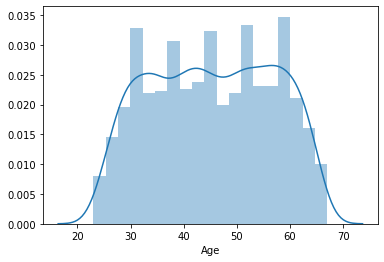

In [225]:
sns.distplot(data['Age'], kde= True)

Observation:1. The mean age of the customers is 45 with standard deviation of 11.5. 
 2.Age is normally distributed 30 years and 60 years of age and mean is almost equal to median

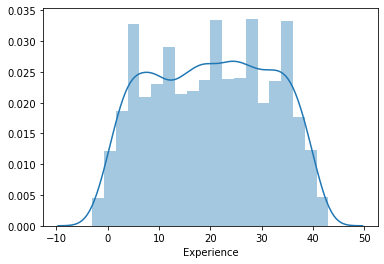

In [226]:
sns.distplot(data['Experience'], kde= True)

In [227]:
# Experience is normally distributed and mean is equal to median. There are negative values here, 
# this could be a data input error as it is not possible to have negative years of experience. 
# We can delete these values.
data[data['Experience'] < 0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [228]:
#drop these 52 values
data=data[data.Experience >= 0]
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


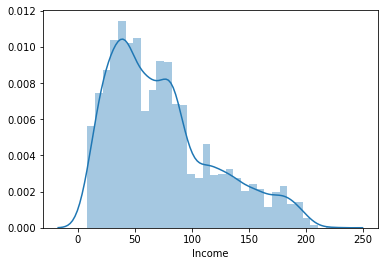

In [229]:
sns.distplot(data['Income'])

Observation:
1.The mean of annual income of the customers is 73.77 with standard deviation of 46. 
2.The curve is moderately positive skewed.
3.Majority have a income between 45K and 55K. 
4.The mean(73.77) is greater than the median(64.0)

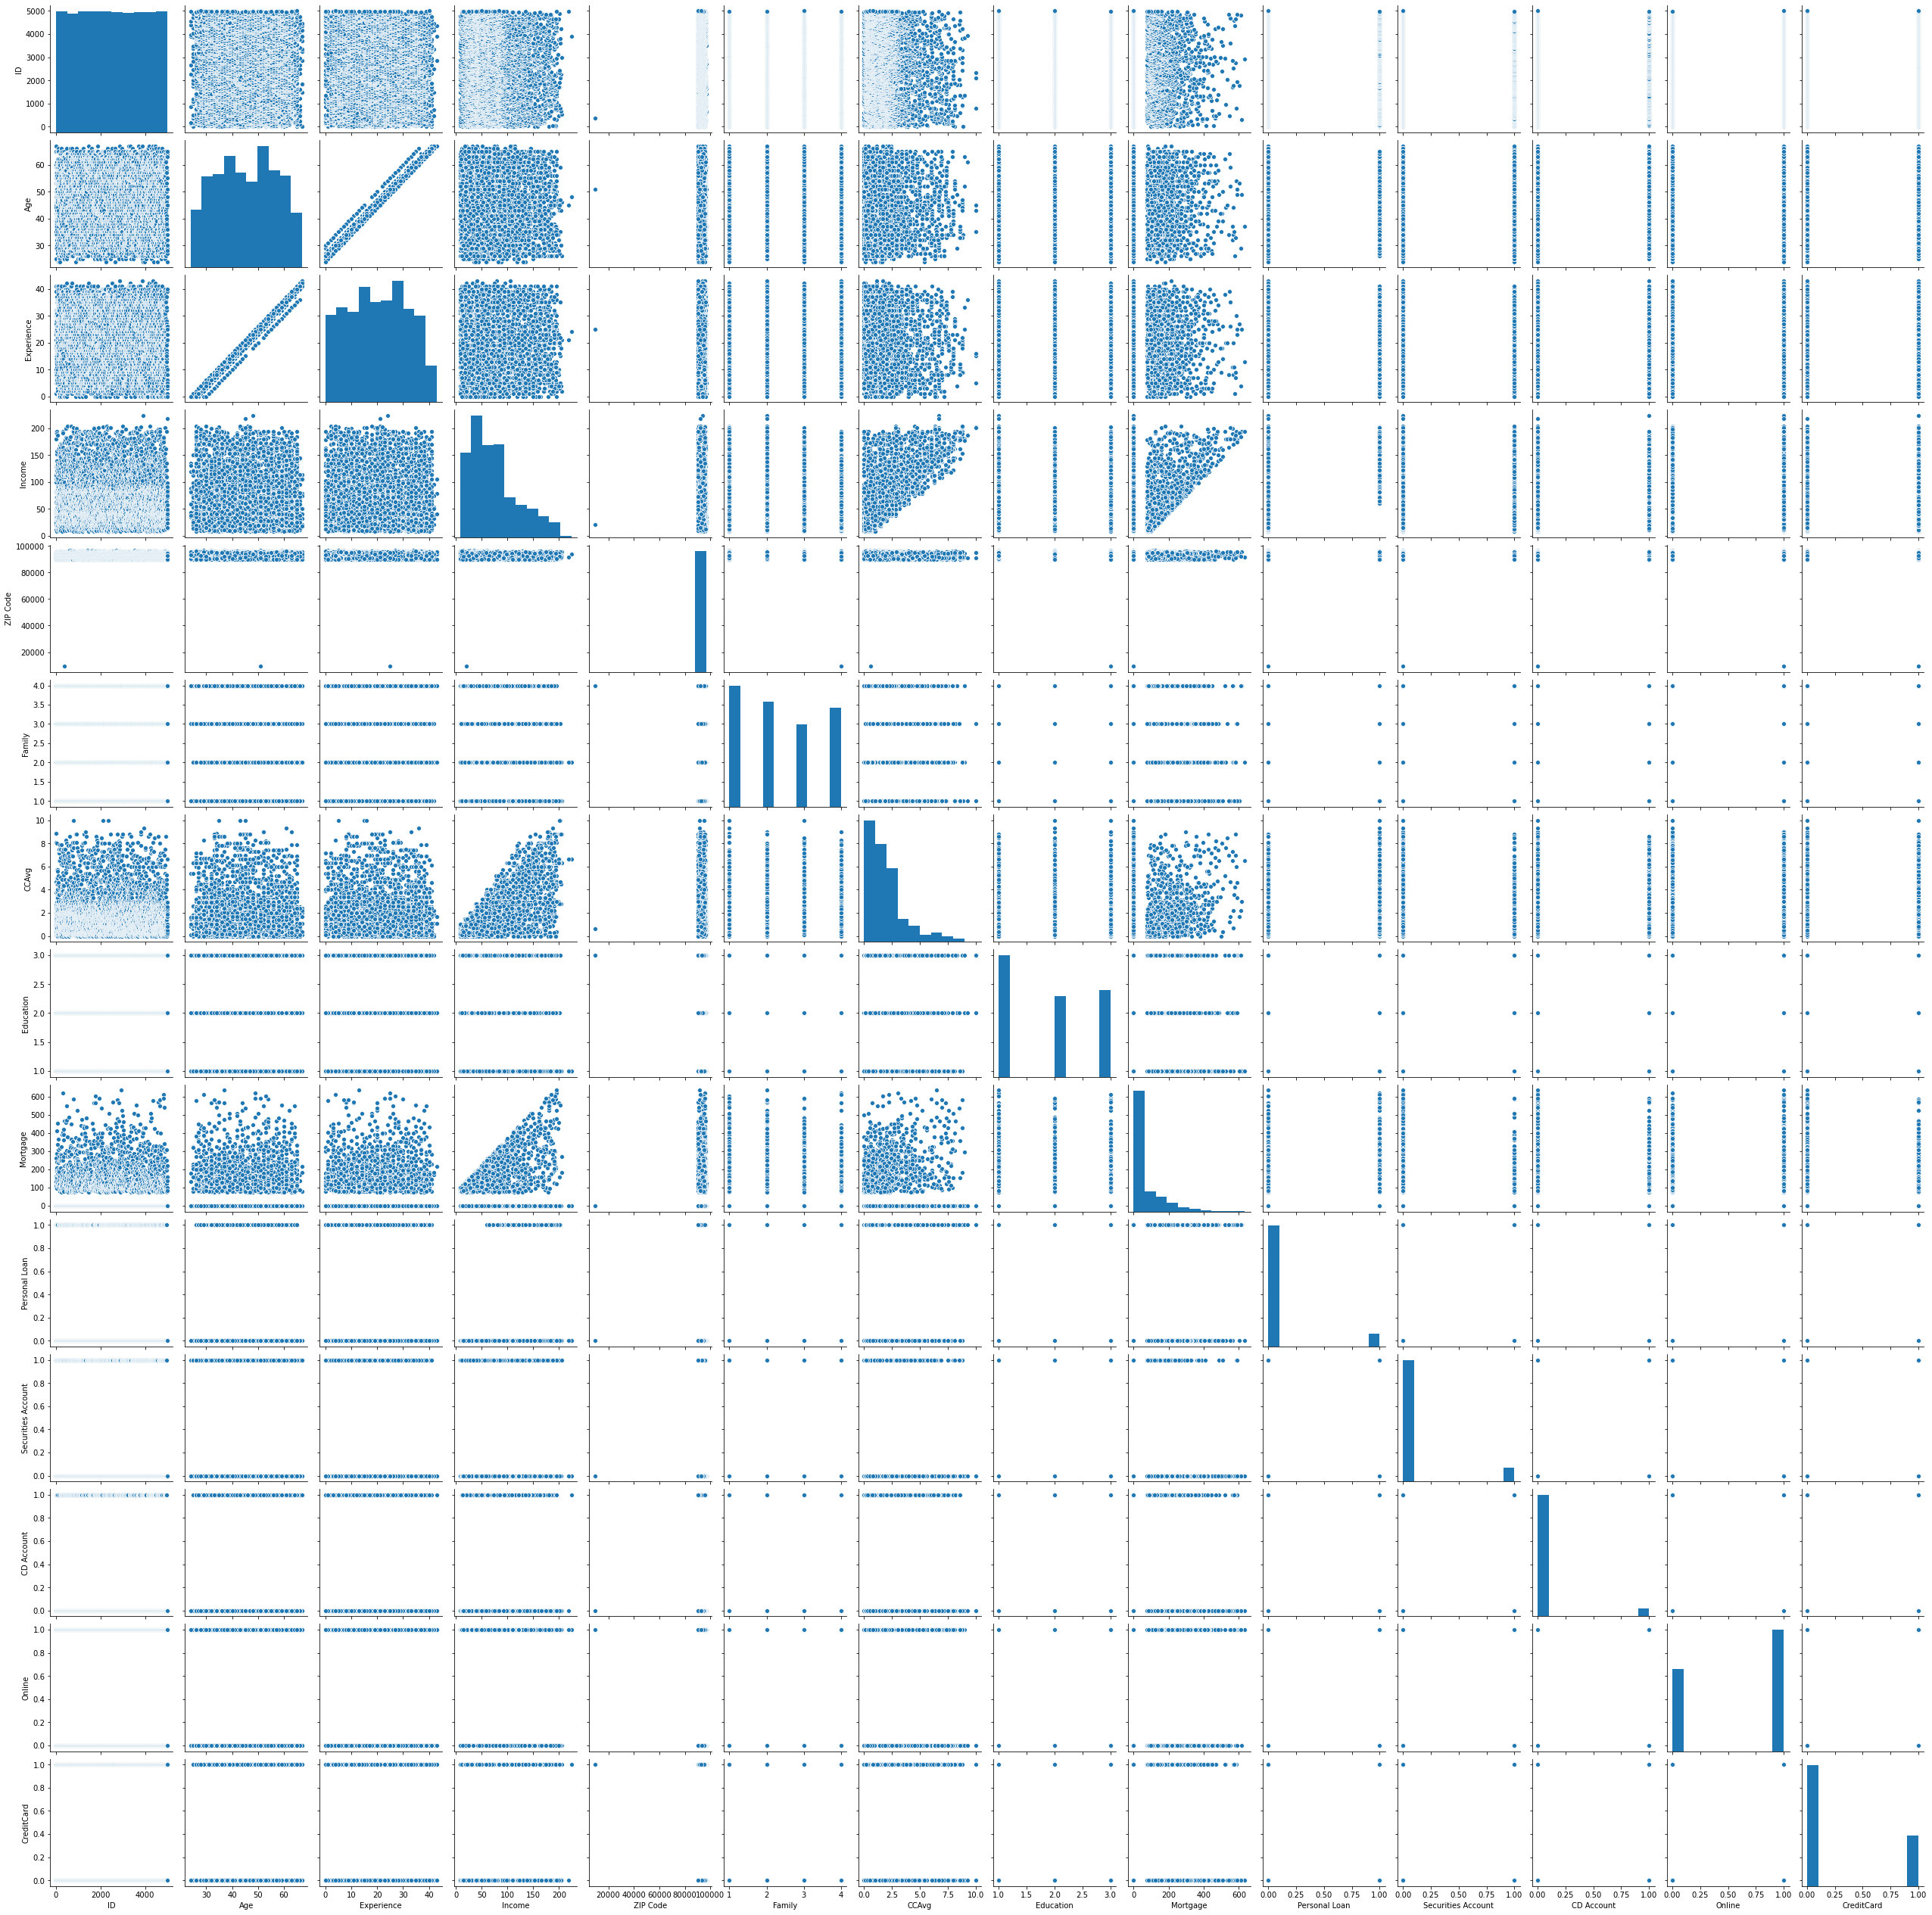

In [230]:
sns.pairplot(data)

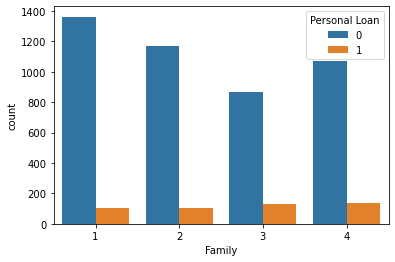

In [231]:
sns.countplot(data["Family"], hue= data["Personal Loan"])

Observation:The number of family members not significantly affect probability

In [232]:
# Bivariate Analysis between categorical independent variable- Eduaction and Continous variable- Personal Loan.
pd.crosstab(data["Education"], data["Personal Loan"])

Personal Loan,0,1
Education,,
1,1987,93
2,1205,182
3,1276,205


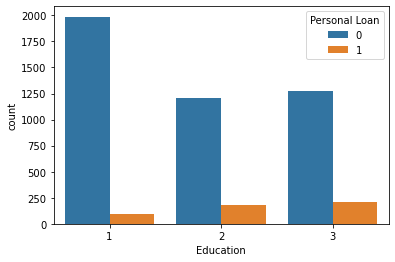

In [233]:
sns.countplot(data["Education"], hue= data["Personal Loan"])

Observation:customers who are more educated have a higher probability of buying personal loans.

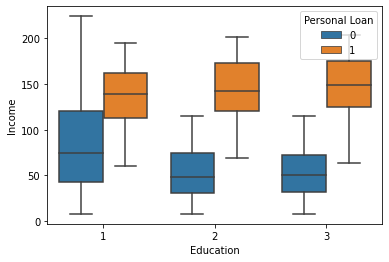

In [234]:
#Lets see the Influence of income and education on personal loan
sns.boxplot(data['Education'], data["Income"], hue= data["Personal Loan"])

Observation:However customers  belonging to these classes and have taken personal loan have the same income levels.
    customers with high incomes are more feasible to buy the personal loans,

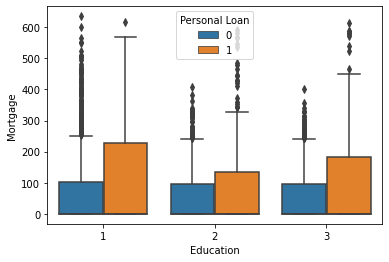

In [235]:
sns.boxplot(data["Education"], data['Mortgage'], hue= data["Personal Loan"])

Observation:customer with low eduaction level and have personal loan have high mortgage

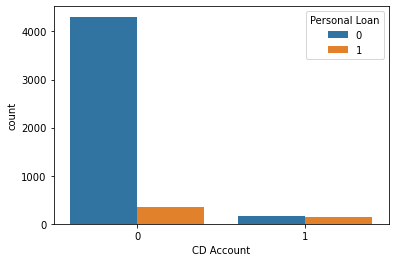

In [236]:
sns.countplot(data["CD Account"],hue= data["Personal Loan"])

Oservation:Customers with no Certificate of deposit account have a very low percentage of personal loan.  
    Almost all the customers who have CD account have loan as well

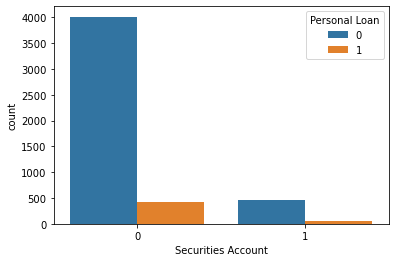

In [237]:
sns.countplot(data["Securities Account"], hue= data["Personal Loan"])

In [238]:
Observation :  Majority of customers who do not have loan have securities account

SyntaxError: invalid syntax (<ipython-input-238-c661f54cd5a4>, line 1)

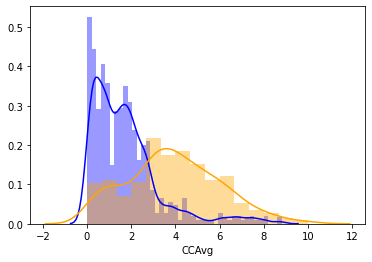

In [239]:
sns.distplot( data[data["Personal Loan"] == 0]['CCAvg'], color = 'blue')
sns.distplot( data[data["Personal Loan"] == 1]['CCAvg'], color = 'orange')

In [240]:
#Credit card spending of Non-Loan customers
data[data["Personal Loan"] == 0]['CCAvg'].median()*1000


1400.0

In [241]:
#Credit card spending of Loan customers
data[data["Personal Loan"]== 1]['CCAvg'].median()*1000

3800.0

Observation: Customers with higher  loan have a higher credit card average. 
    Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. 
    Lower credit card spending with a median of 1400 dollars is less likely to take a loan.
    thus credit card spending and probability of taking a personal loan are linearly related.

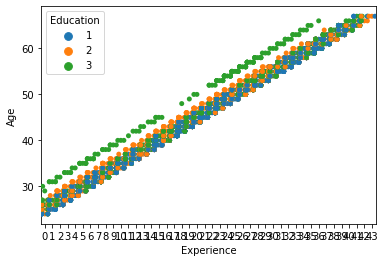

In [242]:
sns.swarmplot(data['Experience'],data['Age'],hue=data['Education'])


Observation: There exists positive correlation between experience and age. 
As experience increase age also increases. 
The colors show the education level. 

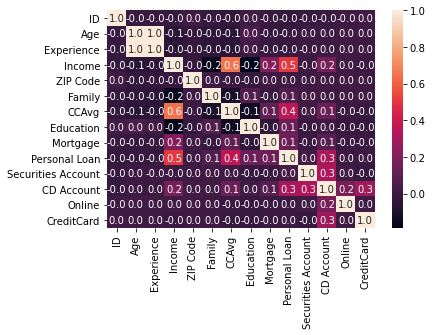

In [243]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()

sns.heatmap(corr,annot=True, fmt='.1f')



Observation

Income and CCAvg is moderately correlated.(0.6)
Age and Experience is highly correlated(1.0)

# applying models

In [256]:
# Copy all the predictor variables into X dataframe. Since 'Personal loan' is dependent variable drop it
X = data.drop(['Personal Loan','Experience','ID','ZIP Code'],axis=1)


# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
y = data['Personal Loan']

X,y

(      Age  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
 0      25      49       4    1.6          1         0                   1   
 1      45      34       3    1.5          1         0                   1   
 2      39      11       1    1.0          1         0                   0   
 3      35     100       1    2.7          2         0                   0   
 4      35      45       4    1.0          2         0                   0   
 ...   ...     ...     ...    ...        ...       ...                 ...   
 4995   29      40       1    1.9          3         0                   0   
 4996   30      15       4    0.4          1        85                   0   
 4997   63      24       2    0.3          3         0                   0   
 4998   65      49       3    0.5          2         0                   0   
 4999   28      83       3    0.8          1         0                   0   
 
       CD Account  Online  CreditCard  
 0              0     

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [313]:
#Splitting of data into training and testing in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [314]:
model = LogisticRegression()
model.fit(X_train, y_train)  #fitting the model into training dataset

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [315]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [316]:
y_test


2376    0
3641    0
3774    0
4143    0
250     0
       ..
2877    0
4436    0
4951    0
589     0
928     0
Name: Personal Loan, Length: 1485, dtype: int64

In [317]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97      1340\n           1       0.77      0.58      0.66       145\n\n    accuracy                           0.94      1485\n   macro avg       0.86      0.78      0.81      1485\nweighted avg       0.94      0.94      0.94      1485\n'

In [318]:
confusion_matrix(y_test, y_pred)

array([[1315,   25],
       [  61,   84]], dtype=int64)

In [319]:
accuracy_score(y_test,y_pred)

0.9420875420875421

#The accuracy score of 92% is a significant number, but from the data we have concluded  that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy desnt’t play a big role in determining how our model performed.
